In [33]:
import pandas as pd

In [34]:
# média moveis

In [35]:
google = pd.read_csv('./data/GOOG-5Y.csv', parse_dates=['Date'], index_col='Date')
google.drop(['Open', 'High', 'Low', 'Volume', 'Close'], axis=1, inplace=True)
google

,Adj Close
Date,
2017-05-31,964.859985
2017-06-01,966.950012
2017-06-02,975.599976
2017-06-05,983.679993
2017-06-06,976.570007
...,...
2022-05-23,2233.330078
2022-05-24,2118.520020
2022-05-25,2116.790039


In [36]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-05-31 to 2022-05-27
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1259 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


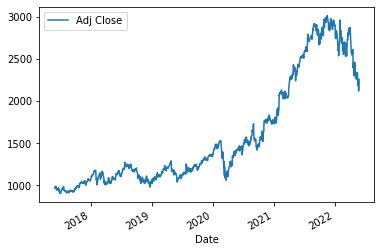

In [37]:
google.plot();

In [38]:
# média móvel simples de 30 dias

google.rolling(window=30).mean()

,Adj Close
Date,
2017-05-31,NaN
2017-06-01,NaN
2017-06-02,NaN
2017-06-05,NaN
2017-06-06,NaN
...,...
2022-05-23,2384.231665
2022-05-24,2368.318001
2022-05-25,2353.294670


In [39]:
# media móvel simples de 30 dias com dropna

google.rolling(window='30D').mean()

,Adj Close
Date,
2017-05-31,964.859985
2017-06-01,965.904999
2017-06-02,969.136658
2017-06-05,972.772492
2017-06-06,973.531995
...,...
2022-05-23,2313.665237
2022-05-24,2304.795000
2022-05-25,2288.967274


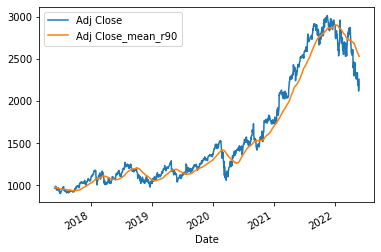

In [40]:
# média móvel simples de 90 dias com dropna	

r90 = google.rolling(window='90D').mean().dropna()

google.join(r90.add_suffix('_mean_r90')).plot();

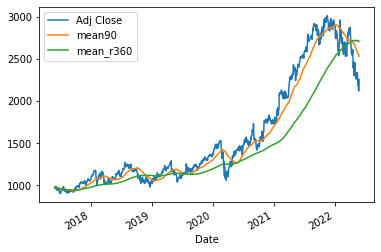

In [43]:
# media de 90 e 360 dias

google['mean90'] = r90

r360 = google['Adj Close'].rolling(window='360D').mean()

google['mean_r360'] = r360

google.plot();

In [44]:
# multiplas métricas 

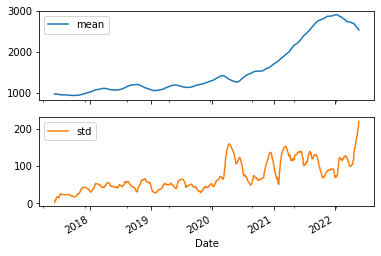

In [46]:
r = google['Adj Close'].rolling(window='90D').agg(['mean', 'std'])

r.plot(subplots=True);

In [47]:
# multiplas métricas 2

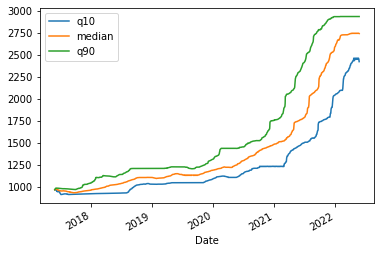

In [48]:
rolling =google['Adj Close'].rolling(window='360D')

q10 = rolling.quantile(0.1).to_frame('q10')

median = rolling.median().to_frame('median')

q90 = rolling.quantile(0.9).to_frame('q90')

pd.concat([q10, median, q90], axis=1).plot();